## Time comparison for the two method to create the Mandelbrot set

In [1]:
import os
import sys
chaoseverywhere = os.path.abspath(os.path.join('..','..'))
if chaoseverywhere not in sys.path:
    sys.path.append(chaoseverywhere)
import chaoseverywhere as chaos
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import patsy
import numpy as np
import pandas as pd  
import statsmodels.api as sm
import time
import statsmodels.formula.api as smf

In [14]:
df = pd.read_csv('data.txt', sep=",", header=None, names=['nb_iter', 'mandel_loop', 'mandelbrot'])
df.head()

,nb_iter,mandel_loop,mandelbrot
0,10,0.187970,0.166974
1,30,0.519807,0.365940
2,50,0.805821,0.656944
3,70,1.141186,0.907765
4,90,1.384899,1.169816


In [15]:
reg_loop = smf.ols('mandel_loop ~ nb_iter', data=df).fit()
reg_loop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mandel_loop   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     355.2
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.76e-15
Time:                        09:24:29   Log-Likelihood:                -26.241
No. Observations:                  25   AIC:                             56.48
Df Residuals:                      23   BIC:                             58.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2346      0.288     -0.813      0.424      -0.831       0.362
nb_iter        0.0188      0.001     18.846      0.000       0.017       0.021
==============================================================================
Omnibus:                       27.502   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.084
Skew:                           2.296   Prob(JB):                     5.97e-11
Kurtosis:                       7.911   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg = smf.ols('mandelbrot ~ nb_iter', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mandelbrot   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     650.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           2.29e-18
Time:                        09:24:43   Log-Likelihood:                -14.793
No. Observations:                  25   AIC:                             33.59
Df Residuals:                      23   BIC:                             36.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2800      0.182     -1.535      0.139      -0.657       0.097
nb_iter        0.0161      0.001     25.497      0.000       0.015       0.017
==============================================================================
Omnibus:                        2.298   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.773
Skew:                           0.642   Prob(JB):                        0.412
Kurtosis:                       2.765   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


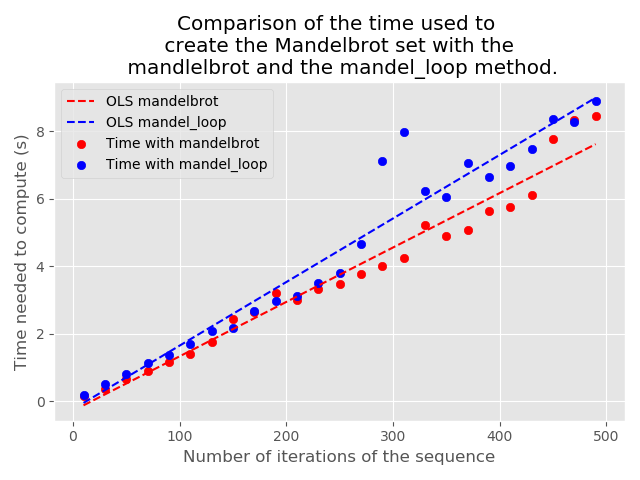

In [18]:
plt.style.use('ggplot')
plt.figure(1)
plt.scatter(df['nb_iter'], df['mandelbrot'], label='Time with mandelbrot', color='red')
plt.plot(df['nb_iter'], reg.predict(df), '--', label='OLS mandelbrot', color='red')
plt.scatter(df['nb_iter'], df['mandel_loop'], label='Time with mandel_loop', color='blue')
plt.xlabel('Number of iterations of the sequence')
plt.ylabel('Time needed to compute (s)')
plt.plot(df['nb_iter'], reg_loop.predict(df), '--', label='OLS mandel_loop', color='blue')
plt.legend()
plt.title("Comparison of the time used to \n create the Mandelbrot set with the \n mandlelbrot and the mandel_loop method.")
plt.tight_layout()